<a href="https://colab.research.google.com/github/fralfaro/MAT281_2022/blob/main/labs/lab_08/lab_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°08



<a id='p1'></a>
## I.- Problema 01


<img src="https://freedesignfile.com/upload/2013/06/Car-logos-1.jpg" width="360" height="360" align="center"/>


El conjunto de datos se denomina `vehiculos_procesado_con_grupos.csv`, el cual contine algunas de las características más importante de un vehículo.

En este ejercicio se tiene como objetivo, es poder clasificar los distintos vehículos basados en las cracterísticas que se presentan a continuación. La dificultad de este ejercicio radíca en que ahora tenemos variables numéricas y variables categóricas.

Lo primero será cargar el conjunto de datos:

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans


%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# cargar datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281_2022/main/labs/lab_08/data/vehiculos_procesado_con_grupos.csv", sep=",")\
       .drop(
            ["fabricante", 
             "modelo",
             "transmision", 
             "traccion", 
             "clase", 
             "combustible",
             "consumo"], 
    
          axis=1)

df.head()

,year,desplazamiento,cilindros,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla
0,1984,2.5,4.0,522.764706,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.222671
1,1984,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
2,1985,2.5,4.0,555.437500,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.236588
3,1985,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
4,1987,3.8,6.0,555.437500,Coches Medianos,dos,Automatica,Premium,grande,alto,alto,0.236588


En este caso, no solo se tienen datos numéricos, sino que también categóricos. Además, tenemos problemas de datos **vacíos (Nan)**. Así que para resolver este problema, seguiremos varios pasos:

### 1.- Normalizar datos

1. Cree un conjunto de datos con las variables numéricas, además, para cada dato vacía, rellene con el promedio asociado a esa columna. Finalmente, normalize los datos mediante el procesamiento **MinMaxScaler** de **sklearn**.

2.-  Cree un conjunto de datos con las variables categóricas , además, transforme de variables categoricas a numericas ocupando el comando **get_dummies** de pandas ([referencia](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)). Explique a grande rasgo como se realiza la codificación de variables numéricas a categóricas.

3.- Junte ambos dataset en uno, llamado **df_procesado**. 


In [3]:
# Parte 1
# Se deben eliminar las variables no numéricas
df_num = df.drop(['clase_tipo','traccion_tipo','transmision_tipo','combustible_tipo','tamano_motor_tipo','consumo_tipo','co2_tipo'],axis=1)
df_num


,year,desplazamiento,cilindros,co2,consumo_litros_milla
0,1984,2.5,4.0,522.764706,0.222671
1,1984,4.2,6.0,683.615385,0.291185
2,1985,2.5,4.0,555.437500,0.236588
3,1985,4.2,6.0,683.615385,0.291185
4,1987,3.8,6.0,555.437500,0.236588
...,...,...,...,...,...
36786,2015,1.0,3.0,244.000000,0.105150
36787,2016,0.9,3.0,246.000000,0.108155
36788,2016,0.9,3.0,255.000000,0.111336
36789,2017,0.9,3.0,248.000000,0.108155


In [4]:
df_num = df_num.apply(lambda x: x.fillna(x.mean()),axis=0) # Toma los valores nulos y los reemplaza por el promedio
df_num.head()

escalar = MinMaxScaler() # función para escalar
columns = ['desplazamiento','cilindros','co2','consumo_litros_milla'] #columnas del dataframe que serán escaladas, no se utiliza la columna 'year'
df_num[columns] = escalar.fit_transform(df_num[columns]) # normalizar los datos usando la funcion MinMaxScaler definida
df_num.head()


,year,desplazamiento,cilindros,co2,consumo_litros_milla
0,1984,0.243590,0.142857,0.398014,0.331027
1,1984,0.461538,0.285714,0.527672,0.475113
2,1985,0.243590,0.142857,0.424351,0.360294
3,1985,0.461538,0.285714,0.527672,0.475113
4,1987,0.410256,0.285714,0.424351,0.360294


In [5]:
# Parte 2
df_aux = df.drop(['year','desplazamiento','cilindros','co2','consumo_litros_milla'], axis=1) #no cuenta éstas columnas (que si son numéricas)
df_aux.head() # dataframe con variables solo del tipo categóricas

,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo
0,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto
1,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto
2,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto
3,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto
4,Coches Medianos,dos,Automatica,Premium,grande,alto,alto


In [6]:
df_cat = pd.get_dummies(df_aux)  # dataframe con variables categóricas, pasadas a 1 o 0
df_cat.head()

,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,clase_tipo_Deportivos,clase_tipo_Furgoneta,clase_tipo_Vehículos Especiales,traccion_tipo_cuatro,traccion_tipo_dos,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0


Este comando transforma categóricas (no son numéricas) en variables que son numéricas, le asigna valores 0 o 1 según su clasificación

In [8]:
# Parte 3:
df_procesado = df_num.join(df_cat) # une los dataframe de variables numéricas y categóricas
df_procesado.head()

,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,1984,0.243590,0.142857,0.398014,0.331027,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,1984,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,1985,0.243590,0.142857,0.424351,0.360294,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,1985,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,1987,0.410256,0.285714,0.424351,0.360294,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0


### 2.- Realizar ajuste mediante kmeans

Una vez depurado el conjunto de datos, es momento de aplicar el algoritmo de **kmeans**.

1. Ajuste el modelo de **kmeans** sobre el conjunto de datos, con un total de **8 clusters**.
2. Asociar a cada individuo el correspondiente cluster y calcular valor de los centroides de cada cluster.
3. Realizar un resumen de las principales cualidades de cada cluster. Para  esto debe calcular (para cluster) las siguientes medidas de resumen:
    * Valor promedio de las variables numérica
    * Moda para las variables numericas
    
    

In [10]:
# Parte 1
kmeans = KMeans(n_clusters=8) #aplica algoritmo kmeans con 8 clusters
kmeans.fit(df_procesado)

# Parte 2
centroides = kmeans.cluster_centers_ # centroides
clusters = kmeans.labels_ 
centroides_df = pd.DataFrame(centroides, columns=list(df_procesado.columns)) # se crea un dataframe con los centroides y mismos nombres para las columnas
df_procesado["cluster"] = clusters # se agrega la columna cruster
df_procesado["cluster"] = df_procesado["cluster"].astype('category')
centroides_df["cluster"] = [1,2,3,4,5,6,7,8]
df_procesado.head()

# Parte 3
for i in range(1,9):
    print("\nClaster "+str(i))
    print("\nEl valor medio de las variables numéricas para el cluster "+ str(i))
    print(df_procesado[df_procesado['cluster']==i-1].drop(list(df_procesado.columns[4:]), axis=1).mean())
    print("\nLa moda de las variables numéricas para el cluster "+ str(i))
    print(df_procesado[df_procesado['cluster']==i-1].drop(list(df_procesado.columns[4:]), axis=1).mode())



Claster 1

El valor medio de las variables numéricas para el cluster 1
year              1993.417123
desplazamiento       0.348710
cilindros            0.263511
co2                  0.378092
dtype: float64

La moda de las variables numéricas para el cluster 1
   year  desplazamiento  cilindros       co2
0  1992        0.307692   0.285714  0.374603

Claster 2

El valor medio de las variables numéricas para el cluster 2
year              2010.996822
desplazamiento       0.373472
cilindros            0.284743
co2                  0.339442
dtype: float64

La moda de las variables numéricas para el cluster 2
   year  desplazamiento  cilindros       co2
0  2009        0.179487   0.285714  0.317749

Claster 3

El valor medio de las variables numéricas para el cluster 3
year              2015.644925
desplazamiento       0.332534
cilindros            0.262033
co2                  0.305551
dtype: float64

La moda de las variables numéricas para el cluster 3
   year  desplazamiento  cilindros   

### 3.- Elegir Número de cluster

Estime mediante la **regla del codo**, el número de cluster apropiados para el caso.
Para efectos prácticos, eliga la siguiente secuencia como número de clusters a comparar:

$$[5, 10, 20, 30, 50, 75, 100, 200, 300]$$

Una ve realizado el gráfico, saque sus propias conclusiones del caso.


In [13]:
# Sección 3
sec = [5,10,20,30,50,75,100,200,300] # secuencia a utilizar
kmeans = [KMeans(n_clusters=i) for i in sec]
score = [kmeans[i].fit(df_procesado).inertia_ for i in range(len(kmeans))]

df_score = pd.DataFrame({'Numero de Clusters':sec,'Score':score}) # crea el dataframe con el score de cada cluster
df_score

,Numero de Clusters,Score
0,5,386550.006310
1,10,202502.783939
2,20,166578.913571
3,30,149671.505610
4,50,126520.776301
5,75,107534.833867
6,100,97389.298610
7,200,77191.010317
8,300,66738.206502


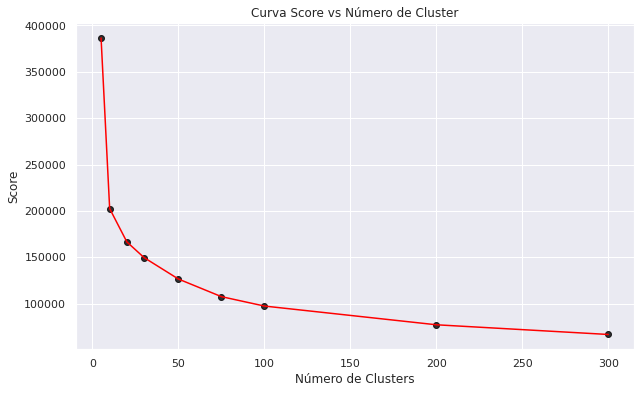

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(df_score['Numero de Clusters'],df_score['Score'], color='red')
plt.scatter(df_score['Numero de Clusters'],df_score['Score'],alpha=0.8, color='black')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Curva Score vs Número de Cluster')
plt.show()

La regla del codo plantea que cuando se muestre un cambio brusco en el gráfico, éste debiese ser el valor óptimo de clusters a utilizar. En el gráfico se muestra que para un valor de 10 existe éste cambio brusco de pendiente, el valor óptimo debiese estar en el rango de 10-20.

## II.- Problema 02

<img src="https://live.staticflickr.com/7866/47075467621_85ab810139_c.jpg" align="center"/>

Para el conjunto de datos de **Iris**, se pide realizar una reducción de dimensionalidad ocupando las técnicas de PCA y TSNE (vistas en clases). 

El objetivo es aplicar ambos algoritmos de la siguiente manera:

* Análisis detallado algoritma PCA (tablas, gráficos, etc.)
* Análisis detallado algoritma TSNE (tablas, gráficos, etc.)
* Comparar ambos algoritmos (conclusiones del caso)

In [61]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

In [42]:
dataset = load_iris()
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
target = 'species'

iris = pd.DataFrame(
    dataset.data,
    columns=features)

iris[target] = dataset.target
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [46]:
# Solución
print('Valor medio de cada variable')
print(iris.mean())

print('\nVarianza de cada variable')
print(iris.var())

Valor medio de cada variable
sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
species         1.000000
dtype: float64

Varianza de cada variable
sepal_length    0.685694
sepal_width     0.189979
petal_length    3.116278
petal_width     0.581006
species         0.671141
dtype: float64


In [62]:
# El siguiente código fue el mismo utilizado en clases, solo se cambio la serie de datos
# Entrenamiento modelo PCA con escalado de los datos
# ==============================================================================
pca_pipe = make_pipeline(StandardScaler(), PCA()) # importar StandardScaler
pca_pipe.fit(iris)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

# Se combierte el array a dataframe para añadir nombres a los ejes.
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = iris.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4','PC5']
)

,sepal_length,sepal_width,petal_length,petal_width,species
PC1,0.444863,-0.233369,0.506043,0.496894,0.494624
PC2,0.381980,0.920972,0.028717,0.070637,-0.009368
PC3,-0.750625,0.287249,-0.028337,0.385446,0.452414
PC4,-0.141201,-0.003513,0.243058,0.612583,-0.738725
PC5,0.269839,-0.121757,-0.826569,0.473583,0.069756


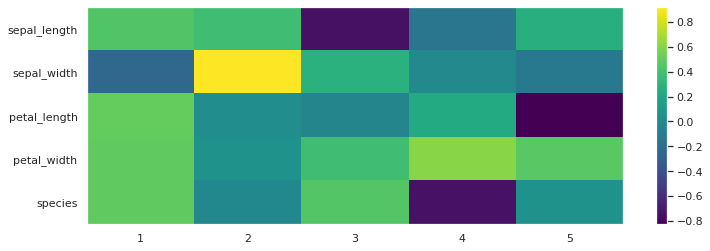

In [63]:
# Heatmap componentes
# ==============================================================================
plt.figure(figsize=(12,4))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(iris.columns)), iris.columns)
plt.xticks(range(len(iris.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

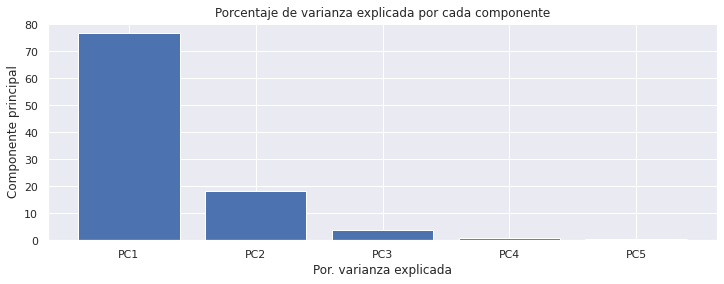

In [64]:
# graficar varianza por componente
percent_variance = np.round(modelo_pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5']

plt.figure(figsize=(12,4))
plt.bar(x= range(1,6), height=percent_variance, tick_label=columns)
plt.xticks(np.arange(modelo_pca.n_components_) + 1)

plt.ylabel('Componente principal')
plt.xlabel('Por. varianza explicada')
plt.title('Porcentaje de varianza explicada por cada componente')
plt.show()

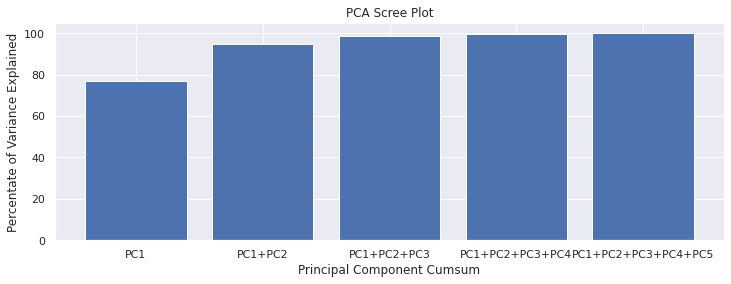

In [65]:
# graficar varianza por la suma acumulada de los componente
percent_variance_cum = np.cumsum(percent_variance)
columns = ['PC1', 'PC1+PC2', 'PC1+PC2+PC3', 'PC1+PC2+PC3+PC4', 'PC1+PC2+PC3+PC4+PC5']

plt.figure(figsize=(12,4))
plt.bar(x= range(1,6), height=percent_variance_cum, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component Cumsum')
plt.title('PCA Scree Plot')
plt.show()

In [66]:
# Proyección de las observaciones de entrenamiento
# ==============================================================================
proyecciones = pca_pipe.transform(X=iris)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5'],
    index   = iris.index
)
proyecciones.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.576120,0.474499,-0.054364,-0.103224,0.032274
1,-2.415322,-0.678092,-0.203080,-0.064962,0.107023
2,-2.659333,-0.348282,0.112681,-0.046176,0.032555
3,-2.601991,-0.603306,0.134288,-0.000629,-0.066072
4,-2.683744,0.640220,0.102711,-0.086924,-0.028450


In [67]:
proyecciones = np.dot(modelo_pca.components_, scale(iris).T) #Importar scale
proyecciones = pd.DataFrame(proyecciones, index = ['PC1', 'PC2', 'PC3', 'PC4','PC5'])
proyecciones = proyecciones.transpose().set_index(iris.index)
proyecciones.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.576120,0.474499,-0.054364,-0.103224,0.032274
1,-2.415322,-0.678092,-0.203080,-0.064962,0.107023
2,-2.659333,-0.348282,0.112681,-0.046176,0.032555
3,-2.601991,-0.603306,0.134288,-0.000629,-0.066072
4,-2.683744,0.640220,0.102711,-0.086924,-0.028450


In [71]:
# Recostruccion de las proyecciones
# ==============================================================================
recostruccion = pca_pipe.inverse_transform(proyecciones)
recostruccion = pd.DataFrame(
                    recostruccion,
                    columns = iris.columns,
                    index   = iris.index
)
print('------------------')
print('Valores originales')
print('------------------')
display(recostruccion.head())

print('---------------------')
print('Valores reconstruidos')
print('---------------------')
display(iris.head())

------------------
Valores originales
------------------


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.000000e+00
1,4.9,3.0,1.4,0.2,0.000000e+00
2,4.7,3.2,1.3,0.2,-2.220446e-16
3,4.6,3.1,1.5,0.2,1.110223e-16
4,5.0,3.6,1.4,0.2,-2.220446e-16


---------------------
Valores reconstruidos
---------------------


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Comparar con PCA

In [72]:
# PCA
scaler = StandardScaler()

X = iris.drop(columns='species')
y = iris['species']
    
embedding = PCA(n_components=2)
X_transform = embedding.fit_transform(X)
    
df_pca = pd.DataFrame(X_transform,columns = ['Score1','Score2'])
df_pca['species'] = y

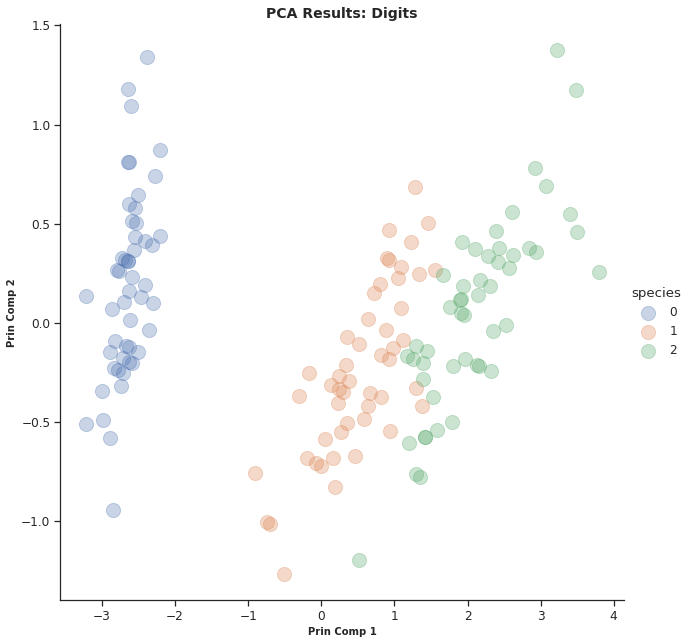

In [73]:
# Plot Digits PCA


# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot(x='Score1',
           y='Score2',
           data=df_pca,
           fit_reg=False,
           legend=True,
           height=9,
           hue='species',
           scatter_kws={"s":200, "alpha":0.3})

plt.title('PCA Results: Digits', weight='bold').set_fontsize('14')
plt.xlabel('Prin Comp 1', weight='bold').set_fontsize('10')
plt.ylabel('Prin Comp 2', weight='bold').set_fontsize('10')

Análisis detallado algoritma TSNE 

In [95]:
# tsne
scaler = StandardScaler()

X = iris.drop(columns='species')
y = iris['species']
    
embedding = TSNE(n_components=2,learning_rate = 'auto', init = 'random')
X_transform = embedding.fit_transform(X)
    
df_tsne = pd.DataFrame(X_transform,columns = ['_DIM_1_','_DIM_2_'])
df_tsne['species'] = y

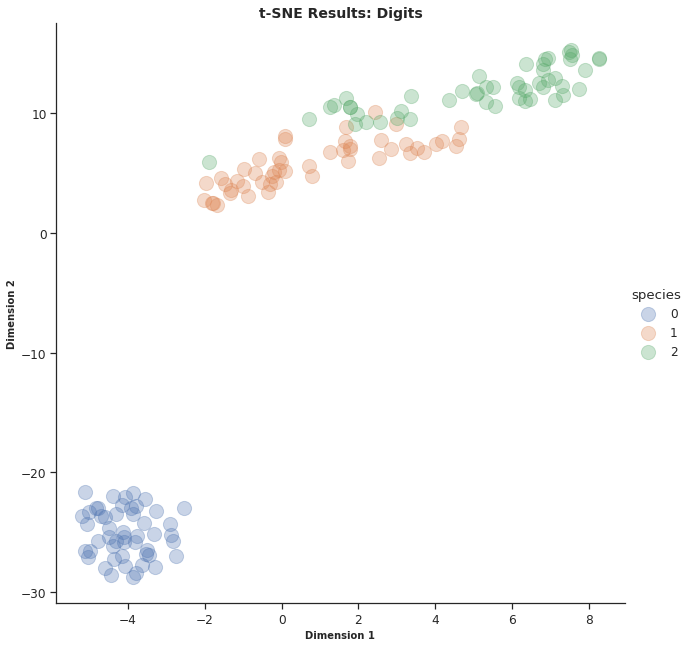

In [96]:
# Plot Digits t-SNE
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot(x='_DIM_1_',
           y='_DIM_2_',
           data=df_tsne,
           fit_reg=False,
           legend=True,
           height=9,
           hue='species',
           scatter_kws={"s":200, "alpha":0.3})

plt.title('t-SNE Results: Digits', weight='bold').set_fontsize('14')
plt.xlabel('Dimension 1', weight='bold').set_fontsize('10')
plt.ylabel('Dimension 2', weight='bold').set_fontsize('10')


Conclusiones: En el método TSNE se observa una mejor diferenciación de los grupos en comparación al método PCA, estos valores están más agrupados.